PRACTICE PROJECT

Income Prediction Machine Learning Project in Python

Link to YouTube: https://youtu.be/dhoKFqhVJu0?si=gbTmO1ym3QD-BVHt

Link to Kaggle notebook: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

In [79]:
import pandas as pd

In [80]:
df = pd.read_csv('/Users/ryanprince/Desktop/Projects/data_ml_learning/data/raw/income.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [36]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [37]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [38]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

### One Hot Encoding 

One Hot Encoding is a method for converting categorical variables into a binary format. It creates new binary columns (0s and 1s) for each category in the original variable. Each category in the original column is represented as a separate column, where a value of 1 indicates the presence of that category, and 0 indicates its absence.

In [81]:
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation, dtype=int).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass, dtype=int).add_prefix('workclass_')], axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status'], dtype=int).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship, dtype=int).add_prefix('relationship')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race, dtype=int).add_prefix('race')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country'], dtype=int).add_prefix('native-country')], axis=1)

In [82]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


Now we can encode the 'gender' and 'income' columns themselves, as binary features, since there are only two values found in each (Male/Female & <=50K/>50K).

In [83]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [84]:
df.columns

Index(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Nev

Now we want to examine the features and their relationship to find if there are any correlations. There are many columns and we want to drop any data that we don't need. 

<Axes: >

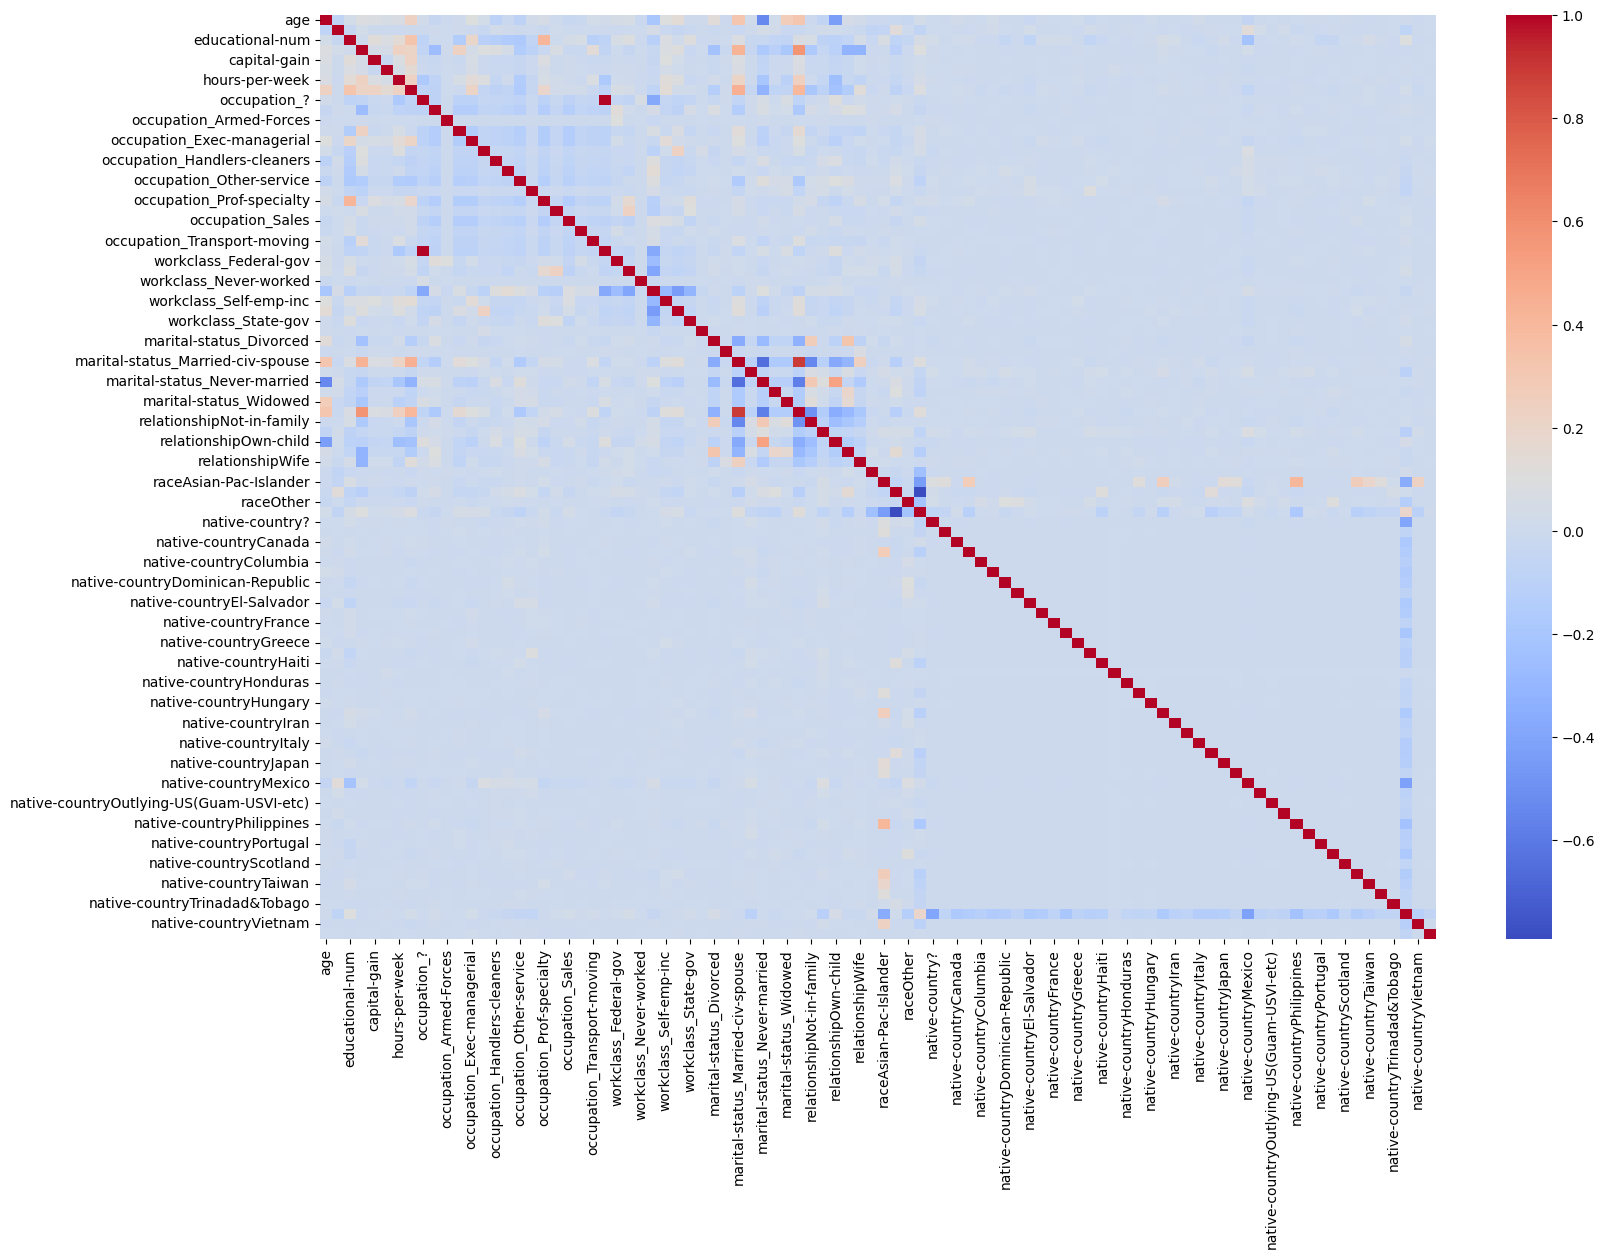

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

There are many features that do not have a correlation, so we want to filter out all the features that do not have high correlation with income. The correlations can be negative or positive, it is only when the correlation is close to zero that it becomes insignificant.

NOTE: we will still use all the data, but for visualizing the data we are going to only be looking at features with a high correlation to income, positive or negative.

In [86]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [87]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationshipHusband,relationshipNot-in-family,relationshipOwn-child,relationshipUnmarried,relationshipWife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<Axes: >

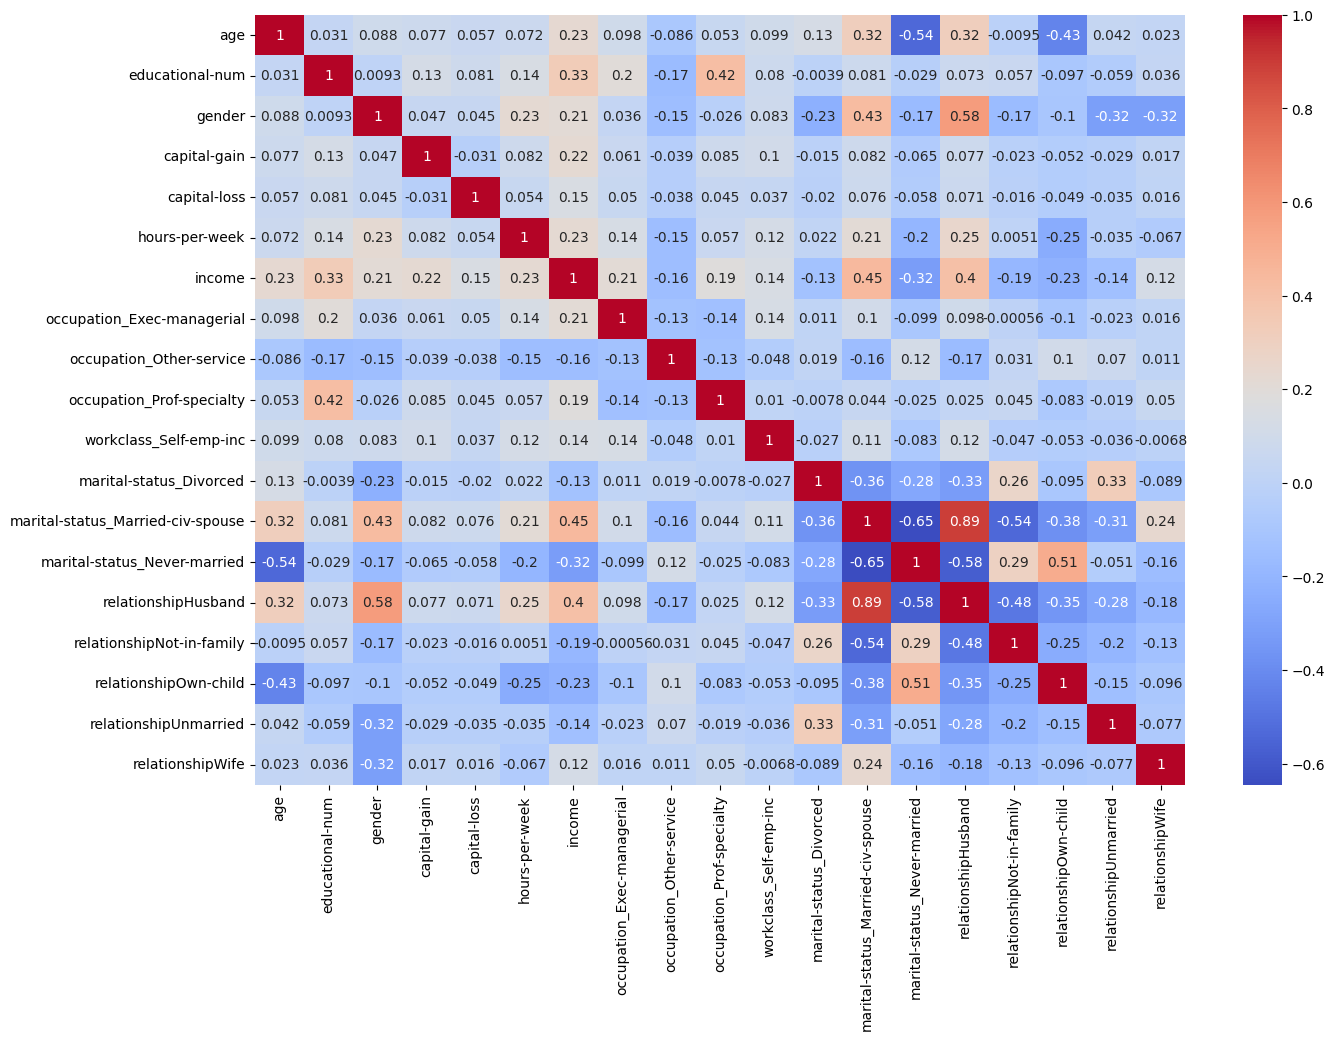

In [88]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis=1)  # ! fnlwgt is not a feature, it tells us how many people belong to that group

train_df, test_df = train_test_split(df, test_size=0.20)  # * 20% of the data will be used for testing

In [93]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
12242,17,8,0,0,0,24,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26775,37,10,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30609,43,13,1,0,0,70,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15360,25,10,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
28915,27,9,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5502,40,10,1,0,0,48,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13999,30,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48769,32,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10960,35,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [94]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
13601,33,13,1,3325,0,43,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36184,18,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34281,26,9,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17122,35,10,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25331,44,9,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19632,30,10,0,0,1719,25,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15427,28,9,0,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5250,48,16,1,15024,0,45,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37826,17,8,0,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [95]:
train_X = train_df.drop('income', axis=1)
train_y = train_df['income']

test_X = train_df.drop('income', axis=1)
test_y = train_df['income']

In [96]:
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [97]:
forest.score(test_X, test_y)

0.9743556931896706

In [98]:
forest.feature_importances_

array([2.29212908e-01, 1.27773489e-01, 1.43011154e-02, 1.09845138e-01,
       3.59564650e-02, 1.15116378e-01, 1.86616469e-03, 5.00050587e-03,
       6.82134046e-05, 5.90353279e-03, 2.04427991e-02, 4.05908429e-03,
       3.07262941e-03, 3.67816181e-03, 7.89291833e-03, 2.00136835e-04,
       1.86310268e-02, 2.72270752e-03, 6.19998498e-03, 4.17579458e-03,
       3.89250490e-03, 1.76373940e-03, 5.15643647e-03, 5.62621145e-03,
       1.79369720e-06, 9.43235818e-03, 5.97602532e-03, 8.66382452e-03,
       4.37792554e-03, 1.79978342e-04, 7.11762730e-03, 3.24569095e-04,
       7.16077950e-02, 1.00677220e-03, 3.02281394e-02, 1.87327738e-03,
       1.63445159e-03, 4.23702518e-02, 1.09129960e-02, 1.95751066e-03,
       1.04669612e-02, 6.00009256e-03, 9.29467489e-03, 1.33289422e-03,
       2.95556222e-03, 4.68037623e-03, 9.30806168e-04, 6.02485623e-03,
       2.83250542e-03, 2.88278815e-04, 1.39710875e-03, 6.34114812e-04,
       2.97820659e-04, 7.10281966e-04, 2.10775308e-04, 1.13113150e-04,
      

In [99]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [100]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [101]:
importances

{'age': np.float64(0.22921290771688616),
 'educational-num': np.float64(0.127773489182128),
 'hours-per-week': np.float64(0.115116378043359),
 'capital-gain': np.float64(0.10984513809156908),
 'marital-status_Married-civ-spouse': np.float64(0.07160779503985637),
 'relationshipHusband': np.float64(0.04237025179718948),
 'capital-loss': np.float64(0.03595646497768361),
 'marital-status_Never-married': np.float64(0.030228139424806053),
 'occupation_Exec-managerial': np.float64(0.020442799063961202),
 'occupation_Prof-specialty': np.float64(0.01863102681677791),
 'gender': np.float64(0.014301115392031055),
 'relationshipNot-in-family': np.float64(0.010912995994399257),
 'relationshipOwn-child': np.float64(0.010466961198002535),
 'workclass_Private': np.float64(0.009432358176866168),
 'relationshipWife': np.float64(0.009294674886432099),
 'workclass_Self-emp-not-inc': np.float64(0.008663824516157862),
 'occupation_Other-service': np.float64(0.007892918327257699),
 'marital-status_Divorced':

Some features are more important than others, so now we're going to do some hyperparameter tuning.

**Hyperparameter tuning** is a machine learning process that finds the best hyperparameters to use when training a model. Hyperparameters are variables that control the learning process and must be set before training begins.

Descriptions of RandomForestClassifier parameters we're going to use for hyperparameter tuning.

n_estimators(int, default=100)              : The number of trees in the forest.

max_depth(int, default=None)                : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split(int or float, default=2)  : The minimum number of samples required to split an internal node:

max_features{“sqrt”, “log2”, None}, int or float, default=”sqrt”  : The number of features to consider when looking for the best split

In [104]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid, verbose=10)

In [105]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.841 total time=   0.3s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.833 total time=   0.3s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.3s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.3s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [106]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=250)

In [107]:
forest = grid_search.best_estimator_

In [108]:
forest.score(test_X, test_y)

0.9342256801371791

In [109]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [110]:
importances

{'age': np.float64(0.1501044789303721),
 'capital-gain': np.float64(0.13918572642071084),
 'educational-num': np.float64(0.13314995017166537),
 'hours-per-week': np.float64(0.0910354815670308),
 'marital-status_Married-civ-spouse': np.float64(0.08809658467960654),
 'relationshipHusband': np.float64(0.06324993077433062),
 'capital-loss': np.float64(0.04163007858405468),
 'marital-status_Never-married': np.float64(0.034034423711441164),
 'occupation_Exec-managerial': np.float64(0.024029399934231782),
 'occupation_Prof-specialty': np.float64(0.020909278910805563),
 'relationshipNot-in-family': np.float64(0.014806520736287928),
 'gender': np.float64(0.014262618891942193),
 'relationshipWife': np.float64(0.011871201205896437),
 'relationshipOwn-child': np.float64(0.010369237725873422),
 'marital-status_Divorced': np.float64(0.010223351280832306),
 'occupation_Other-service': np.float64(0.009172129960783473),
 'workclass_Self-emp-not-inc': np.float64(0.00878477786075781),
 'workclass_Private